In [1]:
#讀入套件
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

#企業
#Delta Air Lines Inc. (DAL)
#American Airlines Group Inc. (AAL)
#United Airlines Holdings Inc. (UAL)
#Southwest Airlines Co. (LUV)

company_list = ['DAL', 'AAL', 'UAL', 'LUV']
company_name = ['Delta', 'American', 'United', 'Southwest']
company_Data = ['', '', '', '']

RawData = pd.read_csv('Dataset/eod_prices_history.csv')
#RawData = RawData.iloc[0:7]

for i in range(4):
    fliter = (RawData["ticker"] == company_list[i])
    company_Data[i] = RawData[fliter]
    company_Data[i]['date'] = pd.to_datetime(company_Data[i]['date'])

<ipython-input-1-1d181504e9e6>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_Data[i]['date'] = pd.to_datetime(company_Data[i]['date'])


In [14]:
from sklearn.preprocessing import MinMaxScaler
training_data_len = ['', '', '', '']
dataset = ['', '', '', '']
scaled_data = ['', '', '', '']

scaler = MinMaxScaler(feature_range=(0,1))

for i in range(4):
    dataset[i] = company_Data[i].filter(['adj_close']).values
    training_data_len[i] = int(np.ceil( len(dataset[i]) * .95 ))
    scaled_data[i] = scaler.fit_transform(dataset[i])
    

In [25]:
def G_train(i):
    test_data = scaled_data[i][training_data_len[i] - 60: , :]

    x_test = []
    y_test = dataset[i][training_data_len[i]:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print("MSE:",rmse)

In [29]:
from tensorflow import keras
model_DAL = keras.models.load_model("DAL.h5")
model_AAL = keras.models.load_model("AAL.h5")
model_UAL = keras.models.load_model("UAL.h5")
model_LUV = keras.models.load_model("LUV.h5")

In [432]:
all_Close = pd.read_csv('Dataset/Company/COMP.csv')
all_Close.head()

,DAL,AAL,UAL,LUV,Tbound,MSCI,CBOE,DALR,AALR,UALR,LUVR,TboundR,MSCIR,CBOER,Unnamed: 14
0,18.409118,33.509130,31.247654,13.467229,4.682,24.97,13.09,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
1,18.640121,34.074685,33.129033,13.625012,4.644,24.97,12.91,0.012393,0.016598,0.056789,0.011580,-0.008183,0.0,-0.013943,0
2,18.089269,33.094390,33.035895,13.689981,4.632,24.97,13.15,-0.030452,-0.029621,-0.002819,0.004746,-0.002591,0.0,0.018251,0
3,17.440685,32.425150,33.324622,13.634293,4.638,24.97,13.21,-0.037188,-0.020640,0.008664,-0.004084,0.001294,0.0,0.004542,1
4,17.582840,32.368595,32.830993,13.495073,4.672,24.97,12.88,0.008085,-0.001747,-0.015035,-0.010316,0.007277,0.0,-0.025621,0


# 1. Decition Tree

In [433]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [696]:
X=all_Close[all_Close.columns[7:-1]] 
Y=all_Close[all_Close.columns[-1]] 

def refresh():
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)  #stratify=y就是按照y中的比例分配
    train_x = np.array(X_train)
    train_y = np.array(y_train)
    test_x = np.array(X_test)
    test_y = np.array(y_test)

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(train_x)
    train_x = scaler.transform(train_x)
    test_x = scaler.transform(test_x)
    
    return train_x, train_y, test_x, test_y

In [475]:
refresh()
tree = DecisionTreeClassifier(max_depth=30,random_state=5) #max_depth 樹的深度 random_state 固定我們分割的內容
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

TreeScore = tree.score(X_test,y_test)

Accuracy on training set: 0.999
Accuracy on test set: 0.535


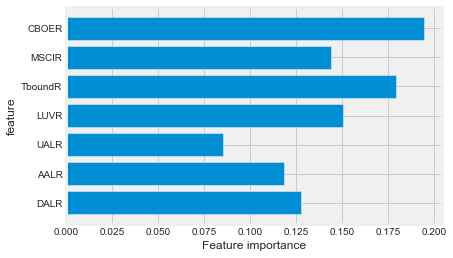

Feature importances:
[0.12749358 0.11862495 0.08522626 0.15040034 0.17953675 0.14425306
 0.19446507]


In [439]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("feature")
    plt.savefig("feature_imporatnace_diabetes.png")
    plt.show()
    plt.close()
plot_feature_importances(tree)
print("Feature importances:\n{}".format(tree.feature_importances_))

# 2. SVM

In [265]:
import joblib
joblib.dump(tree,'tree.pkl')

['tree.pkl']

In [503]:
refresh()
from sklearn import svm
SVM = svm.SVC(kernel = 'linear')

SVM.fit(train_x,train_y)
y_pred = SVM.predict(test_x)


print("Accuracy on training set: {:.3f}".format(accuracy_score(test_y, y_pred)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(test_y, y_pred)))

SVMscore = accuracy_score(test_y, y_pred)
SVMscore

Accuracy on training set: 0.550
Accuracy on test set: 0.550


0.550185873605948

In [505]:
import joblib 

#Storage Model
joblib.dump(SVM, 'svm.pkl')

['svm.pkl']

# 3. KNN

In [783]:
train_x, train_y, test_x, test_y = refresh()
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 25)
knn_clf.fit(train_x,train_y)
y_pred = knn_clf.predict(test_x)

KNNscore = accuracy_score(test_y, y_pred)
KNNscore

0.5278810408921933

In [874]:
import joblib 

#Storage Model
joblib.dump(knn_clf, 'KNN.pkl')

['KNN.pkl']

# 4. SGD

In [873]:
train_x, train_y, test_x, test_y = refresh()
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
SGD_clf.fit(train_x, train_y)

SGDscore = accuracy_score(test_y, y_pred)
SGDscore

0.600185873605948

In [875]:
import joblib 

#Storage Model
joblib.dump(SGD_clf, 'SGD.pkl')

['SGD.pkl']

# 5. AdaBoost

In [878]:
train_x, train_y, test_x, test_y = refresh()
from sklearn.ensemble import GradientBoostingClassifier

Ada_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=5, random_state=0)
Ada_clf.fit(train_x, train_y)

AdaBoostscores = Ada_clf.score(test_x, test_y)
AdaBoostscores

0.6392936802973977

In [880]:
import joblib 

#Storage Model
joblib.dump(Ada_clf, 'Ada.pkl')

['Ada.pkl']

# 6. NN

In [885]:
train_x, train_y, test_x, test_y = refresh()
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(train_x, train_y)

nnScore = nn_clf.score(test_x, test_y)
nnScore

0.726392936802973

In [887]:
import joblib 

#Storage Model
joblib.dump(nn_clf, 'nn.pkl')

['nn.pkl']

In [891]:
print('TreeScore:\n ', TreeScore)
print('SVMscore:\n ', SVMscore)
print('KNNscore:\n ', KNNscore)
print('SGDscore:\n ', SGDscore)
print('AdaBoostscores:\n ', AdaBoostscores)
print('nnScore:\n ', nnScore)

TreeScore:
  0.5353159851301115
SVMscore:
  0.550185873605948
KNNscore:
  0.5278810408921933
SGDscore:
  0.600185873605948
AdaBoostscores:
  0.6392936802973977
nnScore:
  0.726392936802973
